1. [API Gateway - WebSocket API: (Persistent connection)](#API-Gateway---WebSocket-API:-(Persistent-connection))
2. [Process of Connecting to API](#Process-of-Connecting-to-API)
3. [Client to Server Messaging: (Connection ID re-used)](#Client-to-Server-Messaging:-(Connection-ID-re-used))
4. [Server to Client Messaging](#Server-to-Client-Messaging)
3. [WebSocket Connection-URL-Operations](#WebSocket-Connection-URL-Operations)
4. [API Gateway - WebSocket API Routing](#API-Gateway---WebSocket-API-Routing)

#### API Gateway - WebSocket API: (Persistent connection)
- two-way interactive communication between user's browser and server
- servers can push information to the client
- enables stateful application use case
- WebSocket APIs are often used in real-time applications such as chat applications, collaboration platforms, multi-player games, financial trading platforms
- Works in AWS Services (Lambda, DynamoDB) or HTTP endpoints


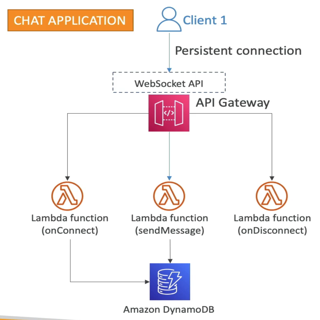

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/websocket.jpeg')
new_image = img.resize((320, 320))
display(new_image)

The Above Process Explained:
- The user web browser sends the persistent connection request to API Gateway (WebSocket API)
- The API Gateway then forwards the request to invoke the Lambda function (onConnect) which is then forwarded to Amazon DynamoDB to keep the connection persistent and store the connection in DynamoDB
- Once stored, now the API Gateway via users can send the messages into another invoked Lambda function (sendMessage) and retrieve the connection related details and later store the message in DynamoDB
- Once all the messages are processed and stored then the API Gateway invokes another Lambda function to disconnect the WebSocket API connection.

Note:
- Persistent Connection:
    - A persistent connection in APIs is a network connection that remains open for multiple requests and responses, instead of closing after each request. This is also known as an HTTP persistent connection, HTTP keep-alive, or HTTP connection reuse. 


#### Process of Connecting to API:

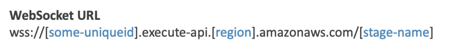

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/url.jpeg')
new_image = img.resize((450, 50))
display(new_image)

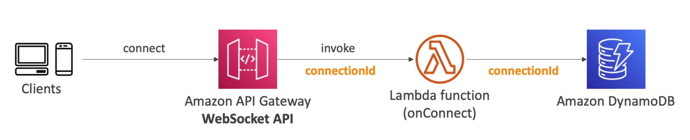

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiweb.jpeg')
new_image = img.resize((690, 140))
display(new_image)

- The user web browser sends the persistent connection request to API Gateway (WebSocket API)
- The API Gateway then forwards the request along with connection Id to invoke the Lambda function (onConnect) which is then forwarded to Amazon DynamoDB with the same connection Id to store the persistent connection related details like user,application,etc in DynamoDB

#### Client to Server Messaging: (Connection ID re-used):
Sample websocket URL

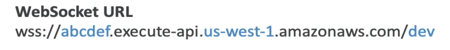

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/url3.jpeg')
new_image = img.resize((450, 50))
display(new_image)

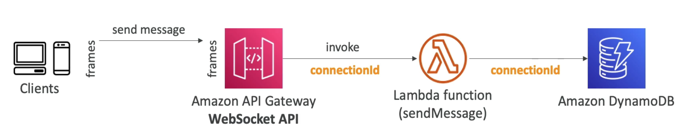

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiweb2.jpeg')
new_image = img.resize((690, 140))
display(new_image)

- Once persistent connection is established, now the client via API Gateway (WebSocket API) can send the messages (frames) into another invoked Lambda function (sendMessage) using same connection Id used. 
- Then by using the same connection Id, it retrieves connection related information such as user details from the DynamoDB and perform some operation. 
- After the operation, the messages can be stored in DynamoDB or not

If the client plans to send more message, the message (frames) are sent through the same connection Id (persistent connection)

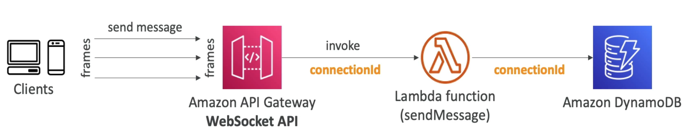

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiweb3.jpeg')
new_image = img.resize((690, 140))
display(new_image)

#### Server to Client Messaging:
- WebSocket URL + @connections/"connectionId"

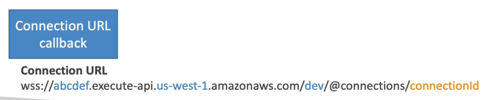

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/url4.jpeg')
new_image = img.resize((490, 100))
display(new_image)

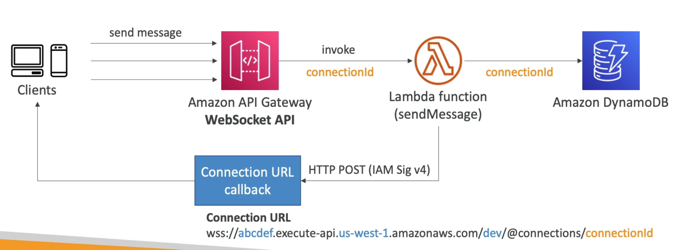

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiwebsocket.jpeg')
new_image = img.resize((690, 250))
display(new_image)

- With WebSocket API, we can enable the Lambda function or any AWS service to send back the HTTP POST request with signed IAM credentials via Sig v4 to the connection URL callback
- Then the connection URL callback in API Gateway will send the message back to client. Thus establishing two-way communication

#### WebSocket Connection URL Operations:

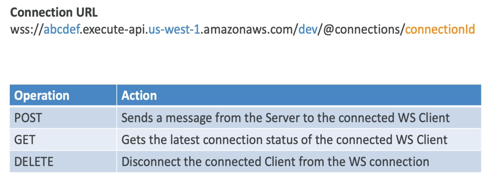

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/websocketurl.jpeg')
new_image = img.resize((490, 180))
display(new_image)

#### API Gateway - WebSocket API Routing:
- Routing helps the WebSocket API in API Gateway to choose appropriate Lambda function in previous example shown such Lambda (onConnect, sendMessage, etc)
- If no routes are configure then it will take the default route
- Use Route Selection Expression, to select the field on JSON file to perform routing
- Sample Expression: $request.body.action (reference the incoming JSON data file as part of the client request/messages)
- The result from Route Selection Expression is evaluated with route keys available in API Gateway
- If the result matched the route key in API Gateway then the route is then connected to the backend service


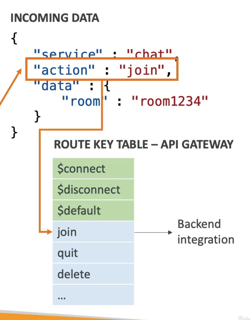

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/routing.jpeg')
new_image = img.resize((250, 320))
display(new_image)